# Weekly Warmup

Write a function Integrate(f,a,b) that uses scispy.integrate.quad to integrate f from a to b. Use this function to plot Li(n) along 100 values of $n[100, 10^{10}]$ 

In [1]:
#My answer.
#I did not figure out how to use integrate so I userd the li function instead. 
import scipy.integrate as integrate
import numpy as np
from mpmath import li
import matplotlib.pyplot as plt

plt.style.use(['no-latex', 'bright'])
#def integrand(x):
#    return x / np.log(x)

#def Integrate(f, a, b):
#   I, _ = integrate.quad(f, a, b) 
#    return I

x = np.linspace(10 ** 2, 10 ** 10, 100)

li_num = [int(li(int(i))) for i in np.nditer(np.linspace(100, 10 ** 10, 100))]

plt.figure(figsize = (8,8))
plt.scatter(x,li_num)
plt.title('Li(n)')
#plt.axis([10 ** 2, 10 ** 10, 10 ** 2, 10 ** 10])
plt.show()

#plt.style.available

<Figure size 800x800 with 1 Axes>

# Week 9: Networks 1


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

# Lecture

In [2]:
# ----------------- !
# Execute this cell !
# ----------------- !

from IPython.display import HTML

def video_html(url):
    return f"""
    <div align="middle">
    <video width="50%" controls>
      <source src="{url}" type="video/mp4">
    </video></div>"""

HTML(video_html('https://www.dropbox.com/s/43ya0a9jmaa6exk/slides_week9_mov.m4v?raw=1'))

## Imports

In [3]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
from collections import Counter
import numpy as np
from netwulf import visualize   # pip install netwulf

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 5.0.1**: List three different real networks and state the nodes and links for each of them.

**Answer:**
1. **Money laundering and terror financing:** The system is world banks, the nodes are bank accounts and the links are money transfers.
2. **Lobbying:** The system is politicians and organizations, the nodes are donations paid to politicians. 
3. **World Trade:** The nodes are states and the links are the import/export from and to each country.

> **Ex. 5.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 

**Answer:**
<br> From the list above I will discuss lobbying. 
1. **Nodes and links:** as described above, the links are politicians and organizations and the nodes are donations.
2. **How large is the network:** I would say it depends on the political system we are looking at. But I would assume for a country like denmark it would be in the thousands of nodes. 
3. **Can it be mapped:** It would depend on the country and what data has to be disclosed and therefore available. But I would assume that for most developed democratic countries it would be available to some degree.
4. **Why do I care about it:** I think it is a new way to get transparency from politicians that was perhaps too complex/expensive in the past. It is yet another tool for the press/citizens to monitor their public officials,  hold them accountable and fight corruption. I believe that the other two networks stated above are also important and interesting, but I also think these are more highly focused on already due to their greater business value. 

> **Ex. 5.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

**Answer**
<br> As the book states, the explosion in interest in the various applications of network science was driven by the immense growth in recent years in our ability to store and analyze data. Therefore, I believe that fields that will have the access to the most diverse and largest type of data would the those that would benefit the most.
<br> Therefore, I would assume that a field like finance, that is not only wealthy but also already quite documented to quite a small level - like transactions, bank transfers and stock trading would greatly expand in this direction in the following decade.

> **Ex. 5.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

**Answer**
<br> A social nerwork of humanity has many connections. Throughout our lives we interact with thousands of people, however, no person will ever meet all people. Therefore, this network is still sparse. 

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 5.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial/index.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

Nodes:  [1, 2, 3, 4]  Edges:  [(1, 2), (3, 4)]


/Users/inbarshamir/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


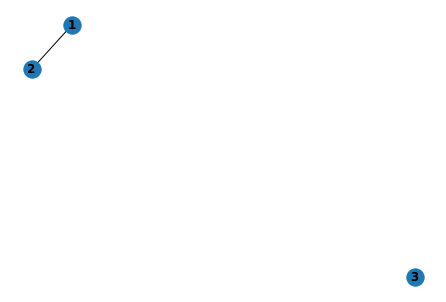

In [4]:
G = nx.Graph()

G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1,2),(3,4)])

print('Nodes: ', G.nodes, ' Edges: ', G.edges)

G.remove_node(4)

nx.draw(G, with_labels=True, font_weight='bold')

> **Ex. 5.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

**Answer:**
1. (from chapter three of the book): A ER network is a random network in which N nodes are connected to each other with a p probablity (referred to in the book as the Gilbert model).

Text(0.5, 1.0, 'Degree Distribution of an ER Network')

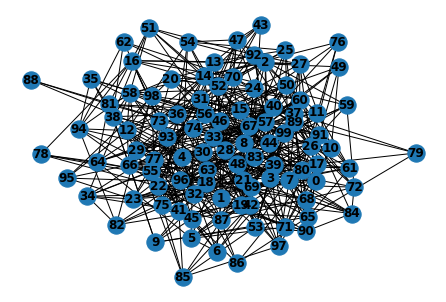

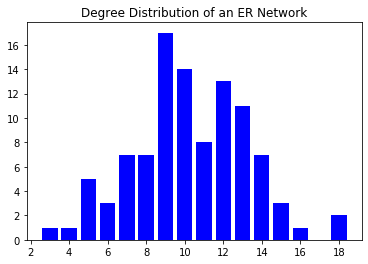

In [5]:
import collections

N = 100
p = 0.1

ER = nx.erdos_renyi_graph(N, p)

nx.draw(ER, with_labels=True, font_weight='bold')

# from netwrokx documentation - examples 
degree_sequence = sorted([d for n, d in ER.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(1,1)

plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Distribution of an ER Network")

> **Ex. 4.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

**Answer:**
1. (from chapter 5 of the book): The BA model is a model in which we start with some $m_0$ number of nodes with arbitrarily-chosen links (each node has at least one link). in each 'period', a new node is added. The new node is connected to the old nodes with $m < m_0$ links. The probabilty of a link between the new node and one of the old nodes is determined by the old node's degree divided by overall degrees in the network: $\Pi = \frac {k_j}{\sum_{j} k_j} \ $

Text(0.5, 1.0, 'Degree Distribution of a BA Network')

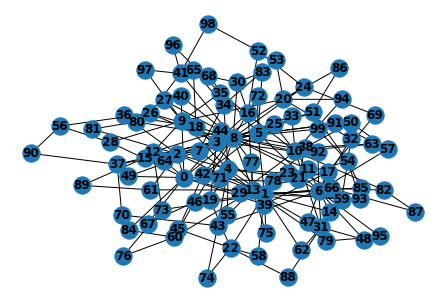

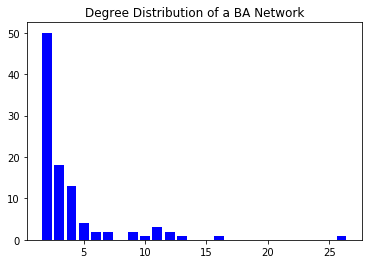

In [6]:
# Answers to question 2-4
N = 100
m = 2

BA = nx.barabasi_albert_graph(N,m)

nx.draw(BA, with_labels=True, font_weight='bold')

degree_sequence = sorted([d for n, d in BA.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(1,1)

plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Distribution of a BA Network")

5. One main difference we can see between the ER and BA networks is in their degree distribution (DD). While the distribution of the ER network is bell-curved, the distribution of the BA network is heavy tailed. The DD of ER is centered around 10 because of the parameteres we defined for our network, since $n = 100$ and $p = 0.1$, we should expect that the degree of most of the nodes would be $100 \times 0.1 = 10$, and the farther away we got from 10, the less nodes we will have with that degree. As for the BA network, the heavy tail is caused by the probabilty of each new node to be connected to an old node (elborated in point 1): The higher degree a node already has, the less likely it is to recieve a new link. Therefore, we would expect most of the nodes to have a low degree. 
6. For example, we could use the networks' clustering coefficients to see how likely two nodes are to be linked to each other. Again, we would expect the clustering coefficient to be higher higher for the ER network. As BA may have a few 'hub' but they are far too few compare to the average degree of the nodes in the ER network.  

### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [7]:
data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(10)

,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

In [8]:
t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.DiGraph` from this dataframe
G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

#data_t.head(1000)

> **Ex: 5.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [9]:
# My Answer:

t0 = data.timestamp.max() - 86400 * 365  # Lower bound of time-slice (here: 365 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

def func(t0, t1):
    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

    return G_t


G_t = func(t0, t1)

print('Nodes: ', G_t.number_of_nodes(), ' Edges: ', G_t.number_of_edges())

Nodes:  44397  Edges:  201632


> **Ex: 5.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

Text(0.5, 1.0, 'Degree Distribution')

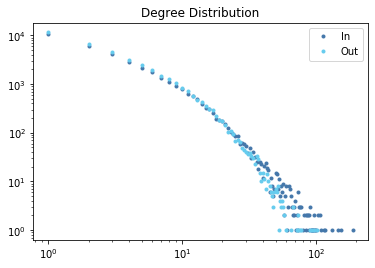

In [10]:
def in_out(dgraph, direction):
    if direction == 'in':
        degree_sequence = sorted([d for n, d in dgraph.in_degree()], reverse=True)  # degree sequence
        degreeCount = collections.Counter(degree_sequence)
        deg, cnt = zip(*degreeCount.items())
    elif direction == 'out':
        degree_sequence = sorted([d for n, d in dgraph.out_degree()], reverse=True)  # degree sequence
        degreeCount = collections.Counter(degree_sequence)
        deg, cnt = zip(*degreeCount.items())
    else: raise ValueError('no such direction')
    
    return deg, cnt
        
in_deg, in_cnt = in_out(G_t, 'in')
out_deg, out_cnt = in_out(G_t, 'out')

plt.figure() 
plt.loglog(in_deg, in_cnt, '.') 
plt.loglog(out_deg, out_cnt, '.') 
plt.legend(['In', 'Out'])
plt.title('Degree Distribution')

> **Ex: 5.2.3**: Using a histogram plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: figure out how to plot a histogram with logarithmic bins.*

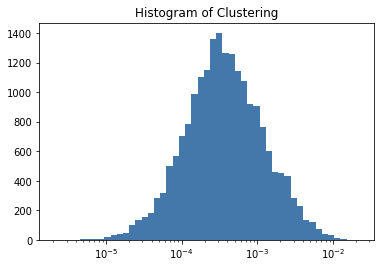

In [11]:
# Answer
clusters = list(nx.clustering(G_t, weight = 'weight').values())
clusters = list(filter(lambda num: num != 0, clusters))
MIN, MAX = min(clusters), max(clusters)

plt.hist(clusters, bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50))
plt.gca().set_xscale("log")
plt.title('Histogram of Clustering')
plt.show()


**Answer:** The clustering seems to follow a Gausian distribution!

We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://netwulf.readthedocs.io/)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 5.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*

In [24]:
t0 = data.timestamp.max() - 86400 * 5  # Lower bound of tme-slice (here: 365 days before last wall post)
t1 = data.timestamp.max()           # Upper bound of time-slice

G_t1 = func(t0, t1)

In [25]:
visualize(G_t1)

(None, None)

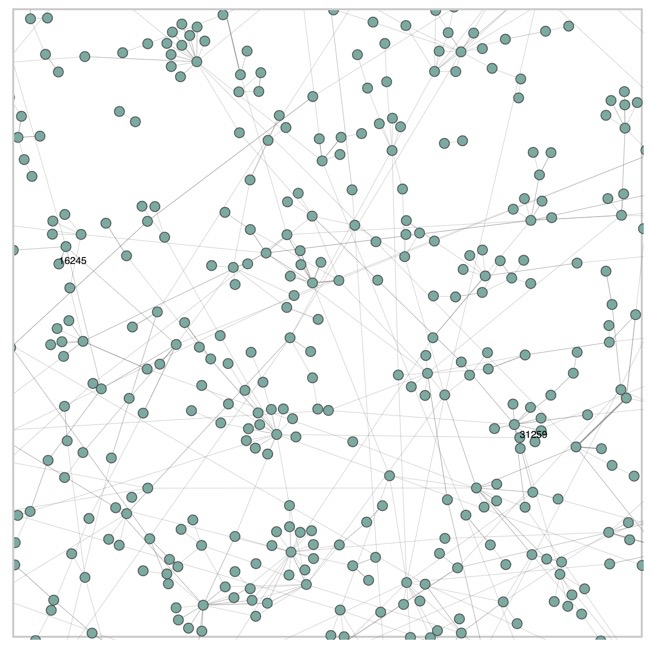

In [26]:
from IPython.display import Image
Image("/Users/inbarshamir/Dropbox/Msc/Econ & ML/Ex. and Solutions/Image 09-04-2020 at 17.38.jpeg")

**Answer:** From limiting the timeframe to the last five days, we can clearly see a few clusters have formed. Those are users who seem to be more central in the New Orleans community.